# What Is a Missing Value?
* Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.
* Below is a sample of the missing data from the Titanic dataset. You can see the columns ‘Age’ and ‘Cabin’ have some missing values.

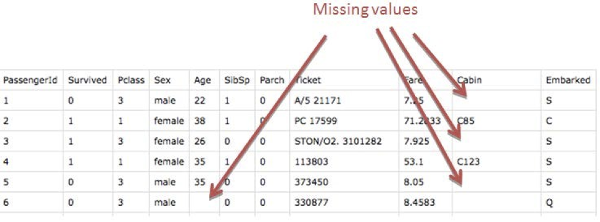

Source: analyticsindiamag

# How Is a Missing Value Represented in a Dataset?
* In the dataset, the blank shows the missing values.

* In Pandas, `usually, missing values are represented by NaN. It stands for Not a Number`.

In [16]:
import pandas as pd

In [56]:
data=pd.read_csv('titanic.csv')

In [57]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* From the above output, we can see that there are 3 columns – Age, Cabin, Embarked, having missing values.

In [10]:
data.isnull().sum().sum()

866

* There are 866 missing values in total.

# Handling Missing Values
### Now that you have found the missing data, how do you handle the missing values?

* Analyze each column with missing values carefully to understand the reasons behind the missing of those values, as this information is crucial to choose the strategy for handling the missing values.

## There are 2 primary ways of handling missing values:

* Deleting the Missing values
* Imputing the Missing Values

# Deleting the Missing value

* Generally, this `approach is not recommended`. It is one of the quick and dirty techniques one can use to deal with missing values. If themissing value is of the type` Missing Not At Random (MNAR), then it should not be deleted`.

* If the missing value is of type `Missing At Random (MAR) or Missing Completely At Random (MCAR) then it can be deleted` (In the analysis, all cases with available data are utilized, while missing observations are assumed to be completely random (MCAR) and addressed through pairwise deletion.)

The disadvantage of this method is one might end up deleting some useful data from the dataset.

There are 2 ways one can delete the missing data values:

# Deleting the entire row (listwise deletion)

* If a row has many missing values, you can drop the entire row.
* If every row has some (column) value missing, you might end up deleting the whole data. 
* The code to drop the entire row is as follows:

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum().sum()

0

# Deleting the entire column

* If a certain column has many missing values, then you can choose to drop the entire column. 
* The code to drop the entire column is as follows:

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df = data.drop(['Embarked'],axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

# Imputing the Missing Value
* There are many imputation methods for replacing the missing values. 
* You can use different python libraries such as Pandas, and Sci-kit Learn to do this.
* Let’s go through some of the ways of replacing the missing values.

# Replacing with an arbitrary value

* If you can make an educated guess about the missing value, then you can replace it with some arbitrary value using the following code. 
* E.g., in the following code, we are replacing the missing values of the ‘Cabin’ column with ‘0’.

In [23]:
#Replace the missing value with '0' using 'fiilna' method
data['Cabin'] = data['Cabin'].fillna(0)
data['Cabin'].isnull().sum()

0

# Replacing with the mean

* This is the most common method of imputing missing values of numeric columns. 
* If there are outliers, then the mean will not be appropriate. 
* In such cases, outliers need to be treated first. You can use the ‘fillna’ method for imputing the columns ‘Age’  with the mean of the respective column values

In [35]:
data['Age'].isnull().sum()

177

In [36]:
#Replace the missing values for numerical columns with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())


In [37]:
data['Age'].isnull().sum()

0

# Replacing with the mode

* Mode is the most frequently occurring value. 
* It is used in the case of categorical features. 
* You can use the ‘fillna’ method for imputing the categorical columns ‘Age,’ ‘Cabin,’ and ‘Self_Employed.’

In [42]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
#Replace the missing values for categorical columns with mode
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Replacing with the median

* The median is the middlemost value. 
* It’s better to use the median value for imputation in the case of outliers. 
* You can use the ‘fillna’ method for imputing the column ‘Age’ with the median value.

In [46]:
data['Age'].isnull().sum()

177

In [47]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [48]:
data['Age'].isnull().sum()

0

# Replacing with the previous value – forward fill

* In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. 
* This is called forward fill. 
* It is mostly used in time series data. 
* You can use the ‘fillna’ function with the parameter ‘method = ffill’

In [51]:
import pandas as pd
import numpy as np
test = pd.Series(range(10))
test.loc[4:8] = np.nan
test

0    0.0
1    1.0
2    2.0
3    3.0
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    9.0
dtype: float64

In [53]:
# Forward-Fill
test.fillna(method='ffill')

0    0.0
1    1.0
2    2.0
3    3.0
4    3.0
5    3.0
6    3.0
7    3.0
8    3.0
9    9.0
dtype: float64

# Replacing with the next value – backward fill

* In backward fill, the missing value is imputed using the next value.

In [54]:
# Backward-Fill
test.fillna(method='bfill')

0    0.0
1    1.0
2    2.0
3    3.0
4    9.0
5    9.0
6    9.0
7    9.0
8    9.0
9    9.0
dtype: float64

# Interpolation

* Missing values can also be imputed using interpolation.
* Pandas’ interpolate method can be used to replace the missing values with different interpolation methods like ‘polynomial,’ ‘linear,’ and ‘quadratic.’ The default method is ‘linear.’

In [55]:
test.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64